In [2]:
"""
@file sobel_demo.py
@brief Sample code using Sobel and/or Scharr OpenCV functions to make a simple Edge Detector
"""
import sys
import cv2 as cv
    
window_name = ('Sobel Demo - Simple Edge Detector')
scale = 1
delta = 0
ddepth = cv.CV_16S

# Load the image
src = cv.imread('data_hierarchy3.png', cv.IMREAD_COLOR)

# 缩小图像,方便看效果
height, width = src.shape[:2]
size = (int(width * 0.3), int(height * 0.3))  # bgr
src = cv.resize(src, size, interpolation=cv.INTER_AREA)

src = cv.GaussianBlur(src, (3, 3), 0)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

cv.imshow(window_name, grad)
cv.waitKey(0)
cv.destroyAllWindows()

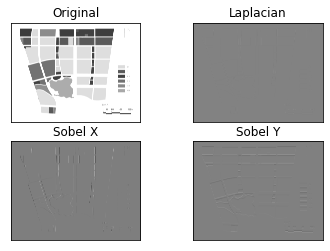

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('data_hierarchy3.png',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [8]:
import numpy as np
def convert_contour_to_pts(cnt):
    """将contour转换成point"""
    pts = []
    for pt in cnt:
        pt_dict = {
            "xAxis": pt[0][0],
            "yAxis": pt[0][1]
        }
        pts.append(pt_dict)

    return pts

arr = np.array([[[1,2]],[[3,4]],[[5,6]]])
arr
pts = convert_contour_to_pts(arr) 
pts

[{'xAxis': 1, 'yAxis': 2}, {'xAxis': 3, 'yAxis': 4}, {'xAxis': 5, 'yAxis': 6}]